In [36]:
import pandas as pd
import folium
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20, 6)})

In [37]:
warnings.filterwarnings('ignore')

In [38]:
#Trabajamos con el dataset actualizado
sadi = pd.read_csv('data/cammesa/centrales.csv', sep=",")

In [39]:
sadi.head()

,Unnamed: 0,id,Nombre,Nemo,Tipo,Potencia,Region,F_desde,F_hasta,lat,lon,provincia,Tipo_eco
0,0,639.0,P.E. ARAUCO II (ETAPA 1 Y 2),AR21EO,eolicas,99.75,NOA,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-28.713251,-66.705385,La Rioja,Renovable
1,1,506.0,ARAUCO EOLICO,ARAUEO,eolicas,25.20,NOA,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-28.701939,-66.752040,La Rioja,Renovable
2,2,568.0,ARAUCO EOLICO 2,ARA2EO,eolicas,25.20,CUY,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-28.692980,-66.754425,La Rioja,Renovable
3,3,614.0,EL JUME,JUMEEO,eolicas,8.00,NOA,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-29.419391,-63.709658,Santiago del Estero,Renovable
4,4,669.0,P.E. Achiras,ACHIEO,eolicas,48.00,CEN,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-33.213184,-65.080059,Córdoba,Renovable


In [40]:
df_sadi = sadi[['id', 'Nombre', 'Nemo', 'Tipo', 'Potencia', 'Region', 'lat', 'lon','provincia','Tipo_eco']]
df_sadi

,id,Nombre,Nemo,Tipo,Potencia,Region,lat,lon,provincia,Tipo_eco
0,639.0,P.E. ARAUCO II (ETAPA 1 Y 2),AR21EO,eolicas,99.75,NOA,-28.713251,-66.705385,La Rioja,Renovable
1,506.0,ARAUCO EOLICO,ARAUEO,eolicas,25.20,NOA,-28.701939,-66.752040,La Rioja,Renovable
2,568.0,ARAUCO EOLICO 2,ARA2EO,eolicas,25.20,CUY,-28.692980,-66.754425,La Rioja,Renovable
3,614.0,EL JUME,JUMEEO,eolicas,8.00,NOA,-29.419391,-63.709658,Santiago del Estero,Renovable
4,669.0,P.E. Achiras,ACHIEO,eolicas,48.00,CEN,-33.213184,-65.080059,Córdoba,Renovable
...,...,...,...,...,...,...,...,...,...,...
351,734.0,C.T. ARREBEEF ENERGIA,ABEF,termicas,1.50,BSAS,-33.762503,-60.090875,Buenos Aires,No Renovable
352,630.0,G ROJO R.ENERGY,ROJO,termicas,258.00,BSAS,-33.454965,-60.281668,Buenos Aires,No Renovable
353,100.0,ACEROS PARANA,APAR,termicas,150.00,BSAS,-33.364149,-60.145681,Buenos Aires,No Renovable
354,322.0,AES-PARANA,AESP,termicas,870.00,BSAS,-33.354883,-60.171846,Buenos Aires,No Renovable


In [41]:
df_sadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         346 non-null    float64
 1   Nombre     356 non-null    object 
 2   Nemo       346 non-null    object 
 3   Tipo       356 non-null    object 
 4   Potencia   356 non-null    float64
 5   Region     356 non-null    object 
 6   lat        356 non-null    float64
 7   lon        356 non-null    float64
 8   provincia  354 non-null    object 
 9   Tipo_eco   356 non-null    object 
dtypes: float64(4), object(6)
memory usage: 27.9+ KB


In [42]:
df_sadi = df_sadi.dropna()

Error in callback <function _draw_all_if_interactive at 0x7f94473f1b80> (for post_execute):


KeyboardInterrupt: 

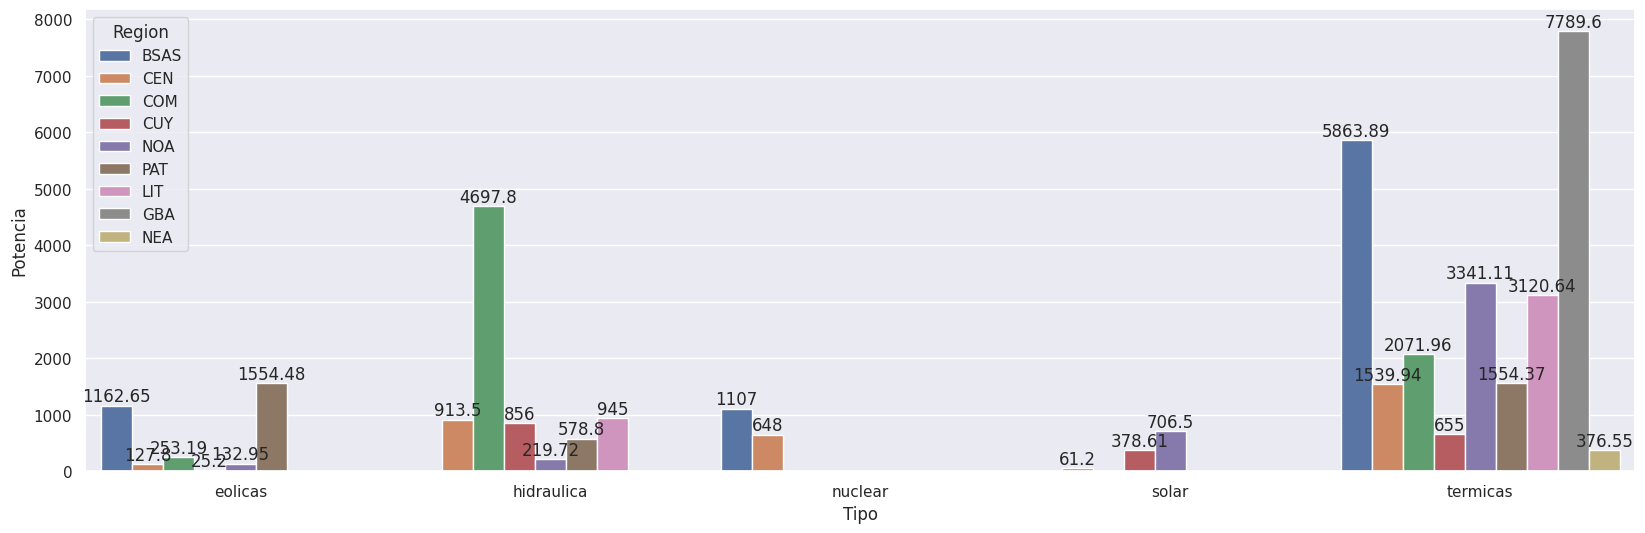

In [43]:
df_sadi_potencias = df_sadi \
    .groupby(['Tipo', 'Region']) \
    .agg({
        'Potencia': np.sum
    }) \
    .reset_index()


ax = sns.barplot(df_sadi_potencias, x='Tipo', y='Potencia', hue='Region', errorbar=None, width=0.9)
for i in ax.containers:
    ax.bar_label(i, )

In [ ]:
mapa = folium.Map(location=[-34.6, -58.4], zoom_start=4)

In [ ]:
colores = {
    'eolicas': 'green',
    'hidraulica': 'blue',
    'nuclear': 'orange',
    'solar': 'yellow',
    'termicas': 'red',
}

for idx in range(len(df_sadi)):
    location = df_sadi.iloc[idx][['lat', 'lon']]
    folium.Marker(
        location=location,
        popup=f"{df_sadi.iloc[idx]['Tipo']}: {df_sadi.iloc[idx]['Nombre']}",
        #Cada icono tiene el color segun el tipo de central
        icon = folium.Icon(color=colores[df_sadi.iloc[idx]['Tipo']], icon='bolt', prefix='fa')
    ).add_to(mapa)

mapa

In [ ]:
#potencia total instalada en cada provincia con el tipo_eco
df_sadi_potencias = df_sadi[['Tipo', 'Region', 'Potencia','provincia','Tipo_eco']] 
df_sadi_potencias_prov = df_sadi_potencias.groupby(['Tipo','provincia','Tipo_eco']).agg({'Potencia': np.sum}).reset_index()
df_sadi_potencias_prov


,Tipo,provincia,Tipo_eco,Potencia
0,eolicas,Buenos Aires,Renovable,1162.65
1,eolicas,Chubut,Renovable,1211.13
2,eolicas,Córdoba,Renovable,127.80
3,eolicas,La Pampa,Renovable,39.60
4,eolicas,La Rioja,Renovable,150.15
5,eolicas,Neuquén,Renovable,100.49
6,eolicas,Río Negro,Renovable,113.10
7,eolicas,Santa Cruz,Renovable,343.35
8,eolicas,Santiago del Estero,Renovable,8.00
9,hidraulica,Chubut,Renovable,578.80


In [ ]:
#Potencia total por tipo en cada Region
df_sadi_potencias = df_sadi[['Tipo', 'Region', 'Potencia','provincia']] 
df_sadi_potencias = df_sadi_potencias.groupby(['Tipo', 'Region']).agg({'Potencia': np.sum}).reset_index()
df_sadi_potencias


,Tipo,Region,Potencia
0,eolicas,BSAS,1162.65
1,eolicas,CEN,127.80
2,eolicas,COM,253.19
3,eolicas,CUY,25.20
4,eolicas,NOA,132.95
5,eolicas,PAT,1554.48
6,hidraulica,CEN,913.50
7,hidraulica,COM,4697.80
8,hidraulica,CUY,856.00
9,hidraulica,LIT,1890.00


In [ ]:
#Potencia total instalada en cada provincia
potencial_prov = df_sadi_potencias_prov.groupby('provincia')['Potencia'].sum().sort_values(ascending=False)
#Convierto a dataframe
potencial_prov = pd.DataFrame(potencial_prov)
potencial_prov

,Potencia
provincia,
Buenos Aires,11844.44
Neuquén,6235.72
CABA,4116.20
Córdoba,3224.64
Santa Fe,3104.04
Chubut,2895.43
Tucumán,1848.03
Salta,1510.42
Mendoza,1481.00


In [ ]:
df_sadi_potencias_prov.drop(columns=['Tipo'], inplace=True)
df_sadi_potencias_prov


,provincia,Tipo_eco,Potencia
0,Buenos Aires,Renovable,1162.65
1,Chubut,Renovable,1211.13
2,Córdoba,Renovable,127.80
3,La Pampa,Renovable,39.60
4,La Rioja,Renovable,150.15
5,Neuquén,Renovable,100.49
6,Río Negro,Renovable,113.10
7,Santa Cruz,Renovable,343.35
8,Santiago del Estero,Renovable,8.00
9,Chubut,Renovable,578.80


In [ ]:
#Agrego a df_sadi_potencias_prov la potenica total de cada provincia
df_sadi_potencias_prov = df_sadi_potencias_prov.merge(df_sadi_potencias_prov.groupby('provincia')['Potencia'].sum().reset_index(), on='provincia', suffixes=('', '_total'))

In [ ]:
df_sadi_potencias_prov

,provincia,Tipo_eco,Potencia,Potencia_total
0,Buenos Aires,Renovable,1162.65,11844.44
1,Buenos Aires,Transicion,1107.00,11844.44
2,Buenos Aires,No Renovable,9574.79,11844.44
3,Chubut,Renovable,1211.13,2895.43
4,Chubut,Renovable,578.80,2895.43
5,Chubut,No Renovable,1105.50,2895.43
6,Córdoba,Renovable,127.80,3224.64
7,Córdoba,Renovable,913.50,3224.64
8,Córdoba,Transicion,648.00,3224.64
9,Córdoba,No Renovable,1535.34,3224.64


In [ ]:
# Lista de provincias
provincias_argentina = df_sadi_potencias_prov['provincia'].unique()

# Guardo los resultados
resultados_por_provincia = pd.DataFrame()

# Iterar a través de cada provincia y realizar las operaciones
for provincia in provincias_argentina:
    df_prov = df_sadi_potencias_prov[df_sadi_potencias_prov['provincia'] == provincia]
    df_prov_reno = df_prov[df_prov['Tipo_eco'] == 'Renovable']
    
    # Calcular el ratio_eco para esta provincia específica
    df_prov_reno['Ratio_eco'] = df_prov_reno['Potencia'].sum() / df_prov['Potencia_total']
    
    resultados_por_provincia = pd.concat([resultados_por_provincia, df_prov_reno])
    resultados_por_provincia.dropna(inplace=True)

resultados_por_provincia


,provincia,Tipo_eco,Potencia,Potencia_total,Ratio_eco
0,Buenos Aires,Renovable,1162.65,11844.44,0.098160
3,Chubut,Renovable,1211.13,2895.43,0.618191
4,Chubut,Renovable,578.80,2895.43,0.618191
6,Córdoba,Renovable,127.80,3224.64,0.322920
7,Córdoba,Renovable,913.50,3224.64,0.322920
10,La Pampa,Renovable,39.60,75.60,0.656085
11,La Pampa,Renovable,10.00,75.60,0.656085
13,La Rioja,Renovable,150.15,217.15,0.953949
14,La Rioja,Renovable,57.00,217.15,0.953949
16,Neuquén,Renovable,100.49,6235.72,0.707262


In [ ]:
#Me quedo con la provincia y el ratio eco
ratio_prov_eco = resultados_por_provincia[['provincia', 'Ratio_eco']]
#Elimino duplicados
ratio_prov_eco = ratio_prov_eco.drop_duplicates()
ratio_prov_eco

,provincia,Ratio_eco
0,Buenos Aires,0.098160
3,Chubut,0.618191
6,Córdoba,0.322920
10,La Pampa,0.656085
13,La Rioja,0.953949
16,Neuquén,0.707262
19,Río Negro,0.665781
22,Santa Cruz,0.398216
24,Santiago del Estero,0.156963
27,Entre Ríos,0.967643


In [ ]:
#Creo un colormap para los valores de la columna "ratio_eco"
cmap = plt.cm.get_cmap('RdYlGn')


<Axes: >

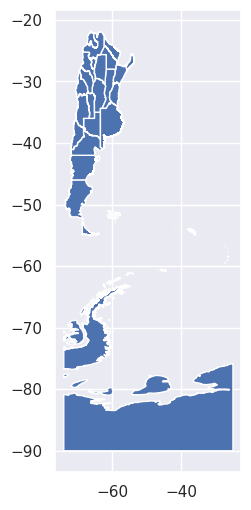

In [ ]:
import geopandas as gpd
#Abro provincias.shp file
mapa_argentina = gpd.read_file('data/GobAr/provincias/provincias.shp')
#Ploteo provincias
mapa_argentina.plot()


In [44]:
#ver la informacion de provincias.shp
mapa_argentina.head(10)
#Cambio mapa_argentina['NAM'] == 'Ciudad Autónoma de Buenos Aires' por CABA
mapa_argentina.loc[mapa_argentina['NAM'] == 'Ciudad Autónoma de Buenos Aires', 'NAM'] = 'CABA'	

In [45]:
mapa_argentina.head()

,OBJECTID,Entidad,Objeto,FNA,GNA,NAM,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
0,427,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,CABA,IGN,Geografía,02,0.020242,0.743806,"POLYGON Z ((-58.34189 -34.63110 0.00000, -58.3..."
1,428,0,Provincia,Provincia del Neuquén,Provincia,Neuquén,IGN,Geografía,58,9.771811,21.515985,"POLYGON Z ((-70.39345 -36.15526 0.00000, -70.3..."
2,429,0,Provincia,Provincia de La Pampa,Provincia,La Pampa,IGN,Geografía,42,14.553019,19.665614,"MULTIPOLYGON Z (((-64.76547 -40.78351 0.00000,..."
3,430,0,Provincia,Provincia de Mendoza,Provincia,Mendoza,IGN,Geografía,50,14.658388,23.259986,"POLYGON Z ((-69.12570 -32.00283 0.00000, -69.1..."
4,431,0,Provincia,Provincia de San Luis,Provincia,San Luis,IGN,Geografía,74,7.333771,14.490196,"POLYGON Z ((-67.05547 -31.85605 0.00000, -67.0..."
